<a href="https://colab.research.google.com/github/TanPMT/FlagDect/blob/trung/Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [2]:

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import cv2
import os
import pandas as pd
from PIL import Image



def extract_color_histogram(image, crop_box=(60, 116, 254, 218), bins=(8, 8, 8)):
    # Crop ảnh
    cropped_image = image[crop_box[1]:crop_box[3], crop_box[0]:crop_box[2]]
    # Chuyển đổi ảnh sau khi crop sang không gian màu RGB
    rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
    # Tính toán histogram màu sắc
    hist = cv2.calcHist([rgb], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    # Chuẩn hóa histogram
    cv2.normalize(hist, hist)
    # Trả về histogram đã làm phẳng
    return hist.flatten()


def load_and_extract_features(data_path):
    features = []
    labels = []
    for idx, filename in enumerate(os.listdir(data_path)):

    # Kiểm tra xem tệp có phải là ảnh không
      if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # Đường dẫn đầy đủ đến tệp ảnh
        image_path = os.path.join(data_path, filename)
        label = filename.split(".")[0]
        # Đọc ảnh từ đường dẫn
        image = cv2.imread(image_path)


        # Tính đặc trưng của ảnh và thêm vào danh sách đặc trưng
        hist = extract_color_histogram(image)
            # if (label == 'Laos' or label == "Yemen" or label == "Vietnam" or label == "Japan" or label == "Jordan"):
        #   print(label)
        labels.append(label)
        features.append(hist)

    # Chuyển danh sách features và labels thành mảng numpy
    return np.array(features), np.array(labels)

In [3]:
train_path = "/gdrive/MyDrive/TrainModel/Dataset/train"
valid_path = "/gdrive/MyDrive/TrainModel/Dataset/valid"
#test_path = "/gdrive/MyDrive/Ảnh/test"
# image_path = "/gdrive/MyDrive/CS231.O21.2/Baitap/Baitap3/dogscats_small/train/cat.1.jpg"
# image = cv2.imread(image_path)
# cv2_imshow(image)
trainX, trainY = load_and_extract_features(train_path)
validX, validY = load_and_extract_features(valid_path)
#testX, testY = load_and_extract_features(test_path)

In [16]:
test_path = "/gdrive/MyDrive/TrainModel/Dataset/test"
testX, testY = load_and_extract_features(test_path)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from google.colab.patches import cv2_imshow
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Huấn luyện mô hình trên dữ liệu huấn luyện
model.fit(trainX, trainY)

trainAcc = model.score(validX, validY)
print("Accuracy of train: ", trainAcc)

#========================================================
#========================================================




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình KNN với số lượng láng giềng k=5 (có thể điều chỉnh)
model_2 = KNeighborsClassifier(n_neighbors=3)

# Huấn luyện mô hình trên dữ liệu huấn luyện
model_2.fit(trainX, trainY)

# Đánh giá độ chính xác của mô hình trên tập validation
validAcc = model_2.score(validX, validY)
print("Accuracy of validation: ", validAcc)


Accuracy of validation:  0.515748031496063


In [ ]:
image_path = "/gdrive/MyDrive/TrainModel/Dataset/train/Vietnam.18.jpg"

image = cv2.imread(image_path)
cv2_imshow(image)
# Trích xuất đặc trưng từ ảnh
hist =  extract_color_histogram(image)

# Reshape đặc trưng để phù hợp với mô hình
hist = hist.reshape(1,-1)

# Dự đoán nhãn của ảnh
predicted_label = model_2.predict(hist)

# In kết quả dự đoán
print("Predicted label:", predicted_label)

In [ ]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC


#model = LogisticRegression(max_iter=1000)
#model = KNeighborsClassifier()


# Khởi tạo mô hình XGBoost
# model = xgb.XGBClassifier()
#model = SVC(kernel='linear', C=1.0, probability=True)
# Khởi tạo mô hình LightGBM
model_ver2 = lgb.LGBMClassifier()
# Compile mô hình
model_ver2.fit(trainX, trainY)

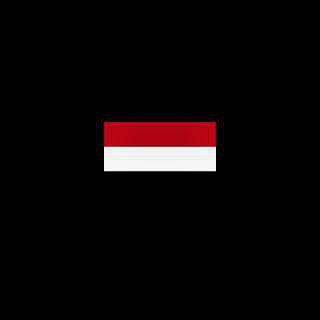

Predicted label: ['Yemen']


In [ ]:
image_path = "/gdrive/MyDrive/TrainModel/Dataset/train/Yemen.2.jpg"

image = cv2.imread(image_path)
cv2_imshow(image)
# Trích xuất đặc trưng từ ảnh
hist =  extract_color_histogram(image)

# Reshape đặc trưng để phù hợp với mô hình
hist = hist.reshape(1,-1)

# Dự đoán nhãn của ảnh
predicted_label = model_ver2.predict(hist)

# In kết quả dự đoán
print("Predicted label:", predicted_label)

In [ ]:
validAcc = model.score(validX, validY)
print("Accuracy of validation: ", validAcc)

Accuracy of validation:  0.7244094488188977


In [ ]:
validAcc = model_ver2.score(validX, validY)
print("Accuracy of validation: ", validAcc)

Accuracy of validation:  0.8937007874015748


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Random Forest với số cây con là 100 (có thể điều chỉnh)
model = RandomForestClassifier(n_estimators=100)

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY là nhãn)
model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set:", valid_acc)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Random Forest với số cây con là 100 (có thể điều chỉnh)
model = RandomForestClassifier(n_estimators=100)

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY là nhãn)
model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set:", valid_acc)


In [20]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình XGBoost với các tham số tùy chỉnh (có thể điều chỉnh)
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY là nhãn)
model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set:", valid_acc)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49], got ['Afghanistan' 'Angola' 'Armenia' 'Azerbaijan' 'Bahrain' 'Bangladesh'
 'Bhutan' 'Brunei' 'Cambodia' 'China' 'Cyprus' 'Georgia' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Israel' 'Japan' 'Jordan' 'Kazakhstan' 'Kuwait'
 'Kyrgyzstan' 'Laos' 'Lebanon' 'Malaysia' 'Maldives' 'Mongolia' 'Myanmar'
 'Nepal' 'North Korea' 'Oman' 'Pakistan' 'Palestine' 'Philippines' 'Qatar'
 'Russia' 'Saudi Arabia' 'Singapore' 'South Korea' 'Sri Lanka' 'Syria'
 'Tajikistan' 'Thailand' 'Timor-Leste' 'Turkey' 'Turkmenistan'
 'United Arab Emirates' 'Uzbekistan' 'Vietnam' 'Yemen']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo một LabelEncoder
label_encoder = LabelEncoder()

# Chuyển đổi các nhãn từ chuỗi sang số nguyên
trainY_encoded = label_encoder.fit_transform(trainY)
validY_encoded = label_encoder.transform(validY)  # Chúng ta chỉ sử dụng transform ở đây vì đã fit trên trainY

# Khởi tạo mô hình XGBoost với các tham số tùy chỉnh (có thể điều chỉnh)
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY_encoded là nhãn đã được chuyển đổi)
model.fit(trainX, trainY_encoded)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY_encoded, valid_pred)
print("Accuracy on validation set:", valid_acc)


In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Naive Bayes (Gaussian Naive Bayes)
model = GaussianNB()

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY là nhãn)
model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set:", valid_acc)


Accuracy on validation set: 0.7244094488188977


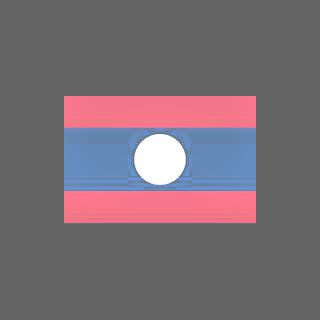

Predicted label: ['Laos']


In [ ]:
image_path = "/gdrive/MyDrive/TrainModel/Dataset/train/Laos.7.jpg"
from google.colab.patches import cv2_imshow
image = cv2.imread(image_path)
cv2_imshow(image)
# Trích xuất đặc trưng từ ảnh
hist =  extract_color_histogram(image)

# Reshape đặc trưng để phù hợp với mô hình
hist = hist.reshape(1,-1)

# Dự đoán nhãn của ảnh
predicted_label = bagging_model.predict(hist)

# In kết quả dự đoán
print("Predicted label:", predicted_label)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Decision Tree
base_model = DecisionTreeClassifier()

# Khởi tạo mô hình Bagging với Decision Tree làm mô hình cơ sở
bagging_model = BaggingClassifier(base_model, n_estimators=120)

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY là nhãn)
bagging_model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = bagging_model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set (Bagging):", valid_acc)


Accuracy on validation set (Bagging): 0.8858267716535433


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Random Forest với 10 cây quyết định
rf_model = RandomForestClassifier(n_estimators=50)

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY là nhãn)
rf_model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = rf_model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set (Random Forest):", valid_acc)


Accuracy on validation set (Random Forest): 0.8818897637795275


In [18]:
from sklearn.metrics import classification_report

# Dùng mô hình đã huấn luyện để dự đoán trên tập validation
#valid_pred = rf_model.predict(validX)
valid_pred = rf_model.predict(validX)
# Tính toán các giá trị đánh giá
report = classification_report(validY, valid_pred)

# In ra báo cáo
print("Classification Report:")
print(report)


Classification Report:
                      precision    recall  f1-score   support

         Afghanistan       1.00      1.00      1.00         9
             Armenia       0.40      0.75      0.52         8
          Azerbaijan       1.00      1.00      1.00        11
             Bahrain       0.82      0.90      0.86        10
          Bangladesh       1.00      1.00      1.00         8
              Bhutan       1.00      1.00      1.00        11
              Brunei       1.00      1.00      1.00        12
            Cambodia       1.00      1.00      1.00        19
               China       0.93      1.00      0.96        13
              Cyprus       1.00      1.00      1.00         7
             Georgia       1.00      1.00      1.00        10
               India       1.00      1.00      1.00        12
           Indonesia       1.00      1.00      1.00        17
                Iran       1.00      0.90      0.95        10
                Iraq       0.29      0.29     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.metrics import classification_report

# Dùng mô hình đã huấn luyện để dự đoán trên tập validation
#valid_pred = rf_model.predict(validX)
test_pred = rf_model.predict(testX)
# Tính toán các giá trị đánh giá
report = classification_report(testY, test_pred)

# In ra báo cáo
print("Classification Report:")
print(report)


Classification Report:
                      precision    recall  f1-score   support

         Afghanistan       1.00      1.00      1.00         1
             Armenia       0.67      0.67      0.67         3
          Azerbaijan       1.00      1.00      1.00         1
             Bahrain       1.00      1.00      1.00         1
          Bangladesh       1.00      1.00      1.00         5
              Brunei       1.00      1.00      1.00         5
            Cambodia       1.00      1.00      1.00         1
               China       1.00      1.00      1.00         1
              Cyprus       1.00      1.00      1.00         4
             Georgia       1.00      1.00      1.00         2
               India       1.00      1.00      1.00         1
           Indonesia       1.00      1.00      1.00         3
                Iran       1.00      1.00      1.00         4
                Iraq       0.50      0.67      0.57         3
              Israel       1.00      1.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


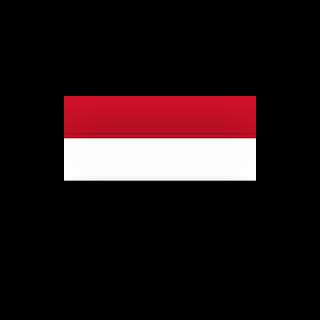

Accuracy: 1.0
Predicted label: ['Yemen']


In [ ]:
image_path = "/gdrive/MyDrive/TrainModel/Dataset/test/Yemen.1.jpg"
from google.colab.patches import cv2_imshow
image = cv2.imread(image_path)
cv2_imshow(image)
# Trích xuất đặc trưng từ ảnh
hist =  extract_color_histogram(image)

# Reshape đặc trưng để phù hợp với mô hình
hist = hist.reshape(1,-1)

# Dự đoán nhãn của ảnh
predicted_label = rf_model.predict(hist)
probabilities = model.predict_proba(hist)

# Tìm chỉ mục của nhãn được dự đoán trong danh sách nhãn của mô hình
label_index = np.where(model.classes_ == predicted_label)[0][0]

# In độ chính xác cho nhãn được dự đoán
print("Accuracy:", probabilities[0][label_index])
# In kết quả dự đoán
print("Predicted label:", predicted_label)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Decision Tree
model = DecisionTreeClassifier()

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY là nhãn)
model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set:", valid_acc)


Accuracy on validation set: 0.639763779527559


In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes


def frame_to_image(frame_data):
    # Decode base64 image
    image_bytes = b64decode(frame_data.split(',')[1])
    # Convert bytes to numpy array
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    # Decode numpy array into OpenCV BGR image
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img

# Sử dụng hàm frame_to_image để chuyển đổi kiểu dữ liệu của biến frame






In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])
    hist =  extract_color_histogram(frame)

# Reshape đặc trưng để phù hợp với mô hình
    hist = hist.reshape(1,-1)

# Dự đoán nhãn của ảnh
    predicted_label = rf_model.predict(hist)

# In kết quả dự đoán
    print("Predicted label:", predicted_label)

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình SVM (Support Vector Machine)
model = SVC()

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY là nhãn)
model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set:", valid_acc)


Accuracy on validation set: 0.45866141732283466
